In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [2]:
DDG_data = pd.read_csv("./1BRS_DDG.txt")

In [3]:
DDG_data.head()

,Mutation,WT_energy,MUT_energy,DDG
0,RA87D,-14.9075,-11.3188,3.5887
1,RA87F,-14.4072,-12.3531,2.0541
2,RA87N,-14.4022,-11.7349,2.6673
3,RA87V,-14.4072,-11.8514,2.5558
4,RA87P,-14.4006,-11.9312,2.4694


In [4]:
## Get DDG for specific known destabilising mutation
DDG_data[DDG_data["Mutation"] == "HA102K"]

,Mutation,WT_energy,MUT_energy,DDG
64,HA102K,-14.3945,-11.8389,2.5556


In [5]:
damaging_mutants = DDG_data[DDG_data["Mutation"].isin(["HA102K", "HA102D", "HA102Q", "HA102G", "HA102L", "HA102A"])]
damaging_mutants["Type"] = "HIS102"

DDG_data["Type"] = "Base"

combined = pd.concat([damaging_mutants, DDG_data], axis =0)

<ipython-input-5-0077788f18b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damaging_mutants["Type"] = "HIS102"


In [6]:
testdist = pd.DataFrame([-1])
testdist["Type"] = "Base"
testdist.columns = ["DDG", "Type"]

combined2 = pd.concat([testdist, damaging_mutants])

In [7]:
DDG_data.head()

,Mutation,WT_energy,MUT_energy,DDG,Type
0,RA87D,-14.9075,-11.3188,3.5887,Base
1,RA87F,-14.4072,-12.3531,2.0541,Base
2,RA87N,-14.4022,-11.7349,2.6673,Base
3,RA87V,-14.4072,-11.8514,2.5558,Base
4,RA87P,-14.4006,-11.9312,2.4694,Base


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-8-936437a320c8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([0,-4, -2,0,2,4,6,8,10,12], size = 14)


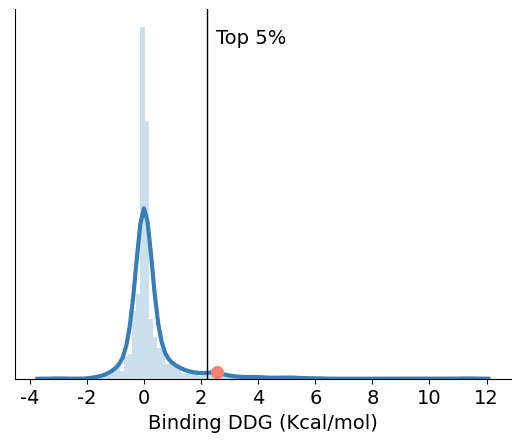

In [8]:
g = sns.distplot(DDG_data["DDG"], norm_hist=True, bins = 100, kde = False, color = sns.color_palette("Set3")[4])
g2 = sns.kdeplot(DDG_data["DDG"], bw = 0.25, color = sns.color_palette("Set1")[1], alpha = 1, legend=False
                ,lw = 3)

g3 = plt.scatter(2.56, 0.04, alpha = 1, s = 70, c = sns.color_palette("Set3")[3], zorder = 2)
sns.despine()

g.set_yticks([])
g.set_xlabel("Binding DDG (Kcal/mol)", size = 14)
g.set_xticklabels([0,-4, -2,0,2,4,6,8,10,12], size = 14)

g.axvline(2.2, c = "k", lw = 1)
g.annotate("Top 5%", (2.5, 2), size = 14)

plt.savefig("Barnase_HIS102LYS_v2.pdf")
plt.show()

In [9]:
## Calculate the top 5th percentile cutoff
np.percentile(DDG_data["DDG"], 95)

2.2004500000000005

In [10]:
import scipy.stats

In [11]:
## To the t-test
scipy.stats.ttest_ind(DDG_data["DDG"], damaging_mutants["DDG"])

Ttest_indResult(statistic=-8.05983543080369, pvalue=2.274048444470727e-15)

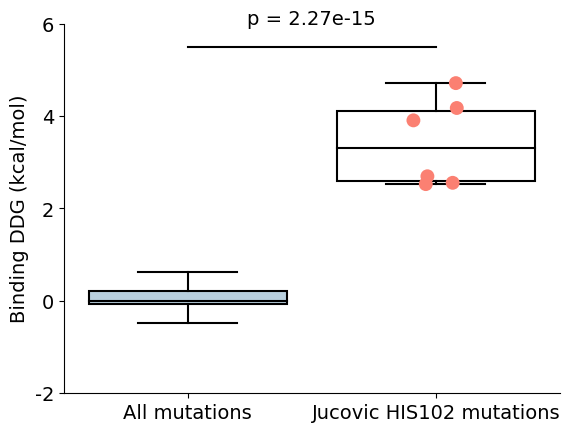

In [12]:
fig, ax = plt.subplots()

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

g2 = sns.stripplot(data = combined2, x = "Type", y = "DDG"
                   , palette=["w", sns.color_palette("Set3")[3]], size = 10, order = ["Base", "HIS102"], zorder = 2)

g = sns.boxplot(x = combined["Type"], y = combined["DDG"], order= ["Base", "HIS102"]
               ,** PROPS, palette= [sns.color_palette("Set3")[4], "white"], zorder = 1, showfliers = False)
for patch in ax.patches:
    r, g1, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g1, b, 0.6))
#g.set_yscale("symlog")

g.set_ylim(-2,6)

    
#g2 = sns.

g.set_xticklabels(["All mutations", "Jucovic HIS102 mutations"], size = 14)
g.set_xlabel("")
g.set_ylabel("Binding DDG (kcal/mol)", size =14)
g.set_yticks([-2,0,2,4,6])
g.set_yticklabels([-2,0,2,4,6], size = 14)

x1, x2 = 0, 1  
y, h, col = 5.5, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.4, "p = 2.27e-15", ha='center', va='bottom', color=col, size = 14)


sns.despine()

plt.savefig("BindingDDG_HISmutationsgroup.pdf")
plt.show()